In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

from drift_diffusion.sim import sim_ddm

# set notebook defaults
%matplotlib widget
%load_ext autoreload
%autoreload 2
plt.rcParams.update({"font.size": 10})

(a) Use the matlab function [simulatevddm_historybias](https://codeocean.com/capsule/0233454/tree/v2) to simulate the 4-parameter DDM. To get started in a reasonable part of parameter space, try `a=2`, `t=1`,  `z=0`, `v=1`; set the noise terms to zero: `sv=0`, `st=0`, `sz=0`; use timestep `dt=0.001s`, and random walk noise `sn=1`. Simulate ~100 trials with `Ntraces=10` and plot some of the correct or error random walk instantiations.  Figure out how many trials you must simulate to reliably estimate the accuracy and mean RT of this DDM model from simulated trial data. Now that you are oriented, simulate trials with a few different coherences (values of `v`), or different decision thresholds (values of `a`), or different starting points (values of `z`) or different non-decision times (values of `t`).  Estimate from simulated trials the accuracy and RT of each model, and demonstrate (with some plots) how each parameter of the 4-parameter "basic" DDM affects overall accuracy and mean reaction time.  

interactive(children=(Dropdown(description='error dist.', options=('gaussian', 'symmetric_bernoulli', 'asymmet…

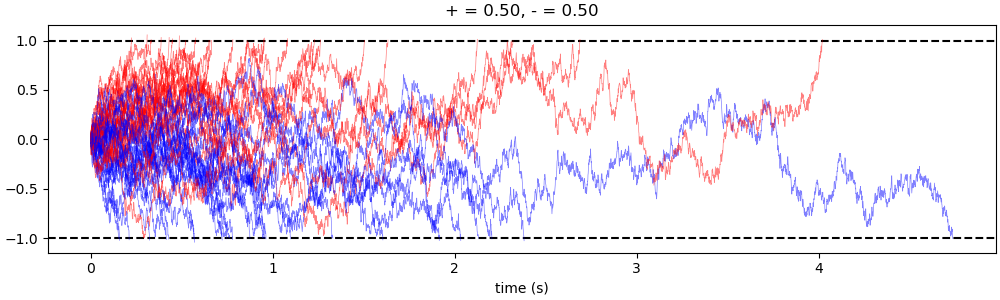

In [2]:
fixed_params = {"dt": 0.001}
variable_params = {
    "error_dist": widgets.Dropdown(
        options=["gaussian", "symmetric_bernoulli", "asymmetric_bernoulli", "t", "mixture"],
        value="gaussian",
        description="error dist.",
    ),
    "t": widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description="t"),
    "st": widgets.FloatSlider(value=0, min=0, max=3, step=0.1, description="st"),
    "z": widgets.FloatSlider(value=0, min=-0.9, max=0.9, step=0.1, description="z"),
    "sz": widgets.FloatSlider(value=0, min=0, max=1.5, step=0.1, description="sz"),
    "v": widgets.FloatSlider(value=0, min=-1, max=1, step=0.1, description="v"),
    "sv": widgets.FloatSlider(value=0, min=0, max=3, step=0.1, description="sv"),
    "a": widgets.FloatSlider(value=2, min=0.5, max=2, step=0.1, description="a"),
}

# initialize figure
fig, ax = plt.subplots(figsize=(10, 3), layout="constrained")


@widgets.interact(**variable_params)
def update_plot(**variable_params):
    """simulate ddm and update plot"""
    ax.clear()

    # simulate ddm
    sim_params = {**fixed_params, **variable_params}
    X = [sim_ddm(**sim_params, seed=idx + 10) for idx in range(50)]

    # plot ddm
    a = variable_params["a"]
    ax.axhline(y=a / 2, c="k", ls="--")
    ax.axhline(y=-a / 2, c="k", ls="--")
    ax.set_xlabel("time (s)")

    n_upper = 0
    for x in X:
        color = "r" if x[-1] > 0 else "b"
        n_upper += 1 if color == "r" else 0
        ax.plot(
            np.arange(len(x)) * fixed_params["dt"],
            x,
            c=color,
            lw=0.5,
            alpha=0.5,
        )
    ax.set_title(f"+ = {n_upper / len(X):.2f}, - = {1 - (n_upper / len(X)):.2f}")
    plt.draw()

(b) For the simulations above, make some additional plots similar to Figure 2 A,B,C of the Shevinsky paper, and compare your plots to the data in A-C or in F-H of the paper.

(c) Hold the four main parameters constant at some values that produce a middling accuracy (70-80%) and then varying the noise parameters `sz` or `sv` or `st` (in separate simulations), and determine how each noise parameter affects overall accuracy, mean RT, and the interaction between accuracy and RT in plots like Shevinsky Fig 2A-C.

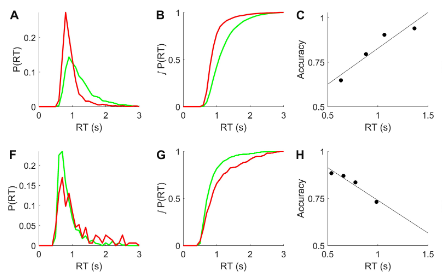

**Fig 2**: Relationship between reaction time and accuracy. 

(A) Example reaction time probability distributions from a rat single-coherence experiment, N = 10,858 trials, 82% correct. Green = correct trials, red = error trials.  
(B) Cumulative distributions, the integrals of curves in (A).  
(C) Accuracy vs. reaction time quartiles (symbols) and linear regression to these points (line), for the data shown in (A,B).
(F) Example reaction time probability distributions from a human subject from a single-coherence epoch with N = 909 trials, 83% correct, colors as in (A).  
(G) Cumulative distributions, the integrals of curves in (F).  
(H) Accuracy vs. reaction time for data in (F,G).

interactive(children=(Dropdown(description='error dist.', options=('gaussian', 'symmetric_bernoulli', 'asymmet…

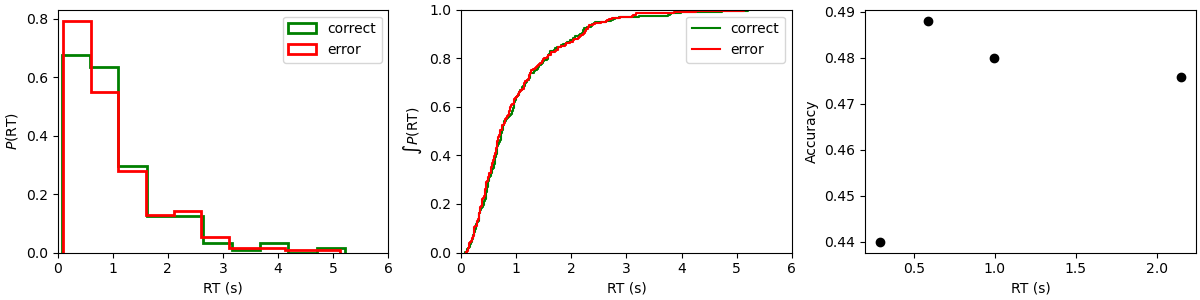

In [3]:
fixed_params = {"dt": 0.001}
variable_params = {
    "error_dist": widgets.Dropdown(
        options=["gaussian", "symmetric_bernoulli", "asymmetric_bernoulli", "t", "mixture"],
        value="gaussian",
        description="error dist.",
    ),
    "t": widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description="t"),
    "st": widgets.FloatSlider(value=0, min=0, max=3, step=0.1, description="st"),
    "z": widgets.FloatSlider(value=0, min=-0.9, max=0.9, step=0.1, description="z"),
    "sz": widgets.FloatSlider(value=0, min=0, max=1.5, step=0.1, description="sz"),
    "v": widgets.FloatSlider(value=0, min=-1, max=1, step=0.1, description="v"),
    "sv": widgets.FloatSlider(value=0, min=0, max=3, step=0.1, description="sv"),
    "a": widgets.FloatSlider(value=2, min=0.5, max=2, step=0.1, description="a"),
}

# initialize figure
fig, axs = plt.subplots(ncols=3, figsize=(12, 3), layout="constrained")


@widgets.interact(**variable_params)
def update_plot(**variable_params):
    """simulate ddm and update plot"""
    [ax.clear() for ax in axs]

    # simulate ddm
    sim_params = {**fixed_params, **variable_params}

    n_traces = 500
    rts, rts_correct = np.zeros(n_traces), np.zeros(n_traces, dtype=bool)
    for trace in range(n_traces):
        x = sim_ddm(**sim_params, seed=trace)
        rts[trace] = len(x) * sim_params["dt"]
        rts_correct[trace] = (x[-1] > 0) == (sim_params["v"] > 0)

    # calculate quartile accuracies
    quartiles = np.quantile(rts, np.linspace(0, 1, 5))
    q_rts, q_acc = np.zeros(4), np.zeros(4)
    for idx in range(4):
        q_rts[idx] = np.mean(rts[(rts >= quartiles[idx]) & (rts < quartiles[idx + 1])])
        q_acc[idx] = np.mean(rts_correct[(rts >= quartiles[idx]) & (rts < quartiles[idx + 1])])

    # plot reaction times
    hist_kwargs = dict(density=True, bins=10, histtype="step", lw=2)
    axs[0].set_xlim([0, 6])
    axs[0].set_xlabel("RT (s)")
    axs[0].set_ylabel(r"$P(\text{RT})$")
    axs[0].hist(rts[rts_correct], color="g", label="correct", **hist_kwargs)
    axs[0].hist(rts[~rts_correct], color="r", label="error", **hist_kwargs)
    axs[0].legend()

    axs[1].set_xlim([0, 6])
    axs[1].set_xlabel("RT (s)")
    axs[1].set_ylabel(r"$\int P(\text{RT})$")
    axs[1].ecdf(rts[rts_correct], color="g", label="correct")
    axs[1].ecdf(rts[~rts_correct], color="r", label="error")
    axs[1].legend()

    axs[2].set_xlabel("RT (s)")
    axs[2].set_ylabel("Accuracy")
    axs[2].scatter(q_rts, q_acc, c="k")

    plt.draw()